In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import aipy
import scipy
import linsolve as ls

In [5]:
# %load cvcr.py
import numpy as np

def cvcr(f,g, op='timecv'):
    """Convolves or correlates to arrays.
    op is operation type.
    scv = Return array in original array units(convolution thm)
    scr = return correlation between the two arrays by conjugating the second
    hcv = similiar to scv but ignores inverse fourier transform and returns array in 'Hz'
    hcr = similiar to scr but ignores the inverse fourier transform"""
    
    assert (op in ('timecv','timecr','freqcv','freqcr'))
    #fourier transform functions
    f_fft = np.fft.rfft(f)
    g_fft = np.fft.rfft(g)
    fg = f_fft*g_fft
    fgc = f_fft*g_fft.conj()
    if op=='timecv':
        fcvg = np.fft.irfft(fg)
        return fcvg
    elif op=='timecr':
        fcrg = np.fft.irfft(fgc)
        return fcrg
    elif op=='freqcv':
        return fg
    elif op=='freqcr':
        return fgc



In [12]:
# %load delay.py
import numpy as np

def delay(array, dt, mode='wcon'):
    '''Returns a shifted or wrapped array based on mode 
    Example:

    Shifts and wraps (Shifts only integer type delays)
    >>>delay([1,2,3,4,5], 3)
    array([3,4,5,1,2])

    Shifts and adds guassian noise 
    >>>delay([1,2,3,4,5], 3, 'ncon')
    array([randint, randint, randint, 1, 2])

    'wfft' mode will shift and wrap an array via convolution theorem
    This mode can handle float type delays 
    '''
    assert (mode in ('wcon' , 'ncon', 'wfft')) #select mode from list
    assert (0 <= np.abs(dt) < array.size) #delay out of possible range
    
    if mode =='wcon':
        assert(type(dt) in (int, long))#To do float type delays use wfft
        d_array = np.concatenate((array[dt-array.size:],array[:dt]))
        return d_array
    elif mode=='ncon':
        assert(type(dt) in (int, long))#To do float type delays use wfft
        rand = np.random.rand(dt)
        d_array = np.concatenate((rand, array[:-rand.size]), axis=0)
        return d_array
    elif mode=='wfft': # TODO Improve Tolerance
        f_fft=np.fft.fft(array)
        #returns cycles per second if sample spacing of f is in seconds
        nu = np.fft.fftfreq(array.size)
#         print ' nu is \n' , nu
        #Phase shift(kronecker delta)
        phi = np.exp(-2j * np.pi *nu * dt)
#         print phi
        fcvp = np.fft.ifft(phi * f_fft)
        d_array = fcvp.astype(array.dtype)
        return d_array
    
def mult(signals, elem, tau='n'):
    '''This function serves to create multiple arrays that 
    are delayed by some random amount.
    signals: Number of desired signal arrays
    elem: number of elements in signal array
    ld: lowest delay
    hd: highest delay
    '''
    assert tau in ('n' , 'rand', 'choose')
    n = np.random.randn(signals, elem)
    if tau == 'n':
        return n
    if tau == 'rand':
        ld = input('Enter minimum delay: ')
        hd = input('Enter max delay: ')
        for i in range(signals):
            r = np.random.randint(ld, hd)
            n[i]= delay(n[i], r, 'wfft')
        return n
    if tau =='choose':
        for i in range(signals):
            print('Delay array ' , i+1 , ' by: ')
            r = input()
            n[i]= delay(n[i], r, 'wfft')
        return n

def dmul(a, dt=0, mode='wcon'):
    
    assert (a.shape[1]>0) #dmul only works for array of arrays
    assert mode in ('wcon' , 'rand' , 'wfft')
    for i in range(a.shape[0]):
        if mode =='wfft':
            f_fft=np.fft.fft(a)
            nu = np.fft.fftfreq(a[i].size)
            phi = np.exp(-2j*np.pi*nu*dt)
            fcvp = np.fft.ifft(phi*f_fft)
            d_a = fcvp.real
    return d_a

In [13]:
signal1 = np.random.randn(4000*1024)
signal2 = np.random.randn(4000*1024)

In [14]:
bl1 = np.array([30e2,0,0])
s1 = np.array([np.sqrt(2)/2, 0 , np.sqrt(2)/2])
clk_pr = 5 # ns
tj1 = np.dot(bl1, s1) / aipy.const.len_ns / clk_pr # Delay in samples

In [15]:
s2 = np.array([-np.sqrt(3)/2, 0, .5])
tj2 = np.dot(bl1, s2) / aipy.const.len_ns / clk_pr # Delay in samples 

In [16]:
anti_1 = delay(signal1, 0, 'wfft')
antj_1 = delay(signal1, tj1, 'wfft')
antk_1 = delay(signal1, 2*tj1, 'wfft')
antl_1 = delay(signal1, 3*tj1, 'wfft')

anti_2 = delay(signal2, 0,'wfft')
antj_2 = delay(signal2, tj2, 'wfft')
antk_2 = delay(signal2, 2*tj2, 'wfft')
antl_2 = delay(signal2, 3*tj2, 'wfft')

/Users/jeffreysalazar/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


In [17]:
# axij.plot(ij, c='b', label = 'aicraj')
# axij.plot(ij_, c='g')
# axij.plot(jk, c='r', label = 'ajcrak')
# axij.plot(jk_, c='y')axij.plot(ij, c='b', label = 'aicraj')
# axij.plot(ij_, c='g')
# axij.plot(jk, c='r', label = 'ajcrak')
# axij.plot(jk_, c='y')
s1st=np.random.randint(1,10)
s2st=np.random.randint(1,10)

gi=np.random.uniform(.5,1.5)
gj=np.random.uniform(.5,1.5)
gk=np.random.uniform(.5,1.5)
gl=np.random.uniform(.5,1.5)

In [18]:
# print gi
# print gj
# print gk
# print gl

In [26]:
gi_ = .75
gj_ = 1
gk_ = 1
gl_ = 1

# Add gain as a function of freq

anti_ = gi_*(s1st*anti_1+s2st*anti_2)
antj_ = gj_*(s1st*antj_1+s2st*antj_2)
antk_ = gk_*(s1st*antk_1+s2st*antk_2)
antl_ = gl_*(s1st*antl_1+s2st*antl_2)

anti = gi*(s1st*anti_1+s2st*anti_2)
antj = gj*(s1st*antj_1+s2st*antj_2)
antk = gk*(s1st*antk_1+s2st*antk_2)
antl = gl*(s1st*antl_1+s2st*antl_2)
print anti.shape

(4096000,)


In [28]:
for a in (anti, antj , antk, antl, anti_, antj_, antk_, antl_):
    a.shape = (-1,1024)

print anti.shape

(4000, 1024)


In [33]:
op='freqcr'
ijcor = cvcr(anti, antj, op)
jkcor = cvcr(antj, antk, op)
klcor = cvcr(antk, antl, op)
ikcor = cvcr(anti, antk, op)
jlcor = cvcr(antj, antl, op)
ilcor = cvcr(anti, antl, op)
ikcor = cvcr(anti, antk, op)
print ijcor.shape

ijcor_ = cvcr(anti_, antj_, op)
jkcor_ = cvcr(antj_, antk_, op)
klcor_ = cvcr(antk_, antl_, op)
ikcor_ = cvcr(anti_, antk_, op)
jlcor_ = cvcr(antj_, antl_, op)
ilcor_ = cvcr(anti_, antl_, op)
ikcor_ = cvcr(anti_, antk_, op)

(4000, 513)


In [53]:
print ijcor[0]
print '-----------------------'
print ijcor[1]

[  2.99313445e+04 +0.00000000e+00j   6.12814758e+03 -3.13393494e+02j
   1.52448027e+04 -8.42146741e+03j   4.66690827e+04 -7.33598075e+02j
   2.80952089e+05 -4.46876244e+04j   1.56446194e+04 -1.47140573e+03j
   3.14293337e+04 -5.99277235e+03j   9.19224787e+04 +2.73671556e+04j
   6.02447148e+04 -1.51839972e+05j   4.33902439e+05 -1.56189238e+05j
  -5.06387683e+03 -1.95177864e+04j   5.01069024e+04 -6.69542220e+04j
   4.16961837e+04 +2.30081550e+03j  -1.42582684e+04 +5.24669996e+03j
  -6.36570761e+03 -6.25051288e+04j   5.27333972e+03 +1.51664203e+03j
   4.02274418e+04 -8.17604435e+04j  -6.55401040e+03 -1.71839683e+04j
  -1.92731375e+04 -1.15132520e+04j  -8.19845650e+04 -6.21753000e+04j
  -7.52619525e+04 -4.12960926e+04j  -3.17867653e+04 -1.12865488e+04j
  -1.62442839e+04 -6.54888047e+04j   2.01436238e+04 -1.91567245e+04j
  -3.58973045e+04 +2.88541106e+04j  -3.41165508e+02 +1.17220544e+04j
  -2.97705431e+04 +4.91883441e+04j  -7.81117598e+02 +3.95415488e+03j
  -6.05742447e+04 -2.29627968e+04j

In [34]:
ijvis = np.average(ijcor, axis=0)
jkvis = np.average(jkcor, axis=0)
klvis = np.average(klcor, axis=0)
ikvis = np.average(ikcor, axis=0)
jlvis = np.average(jlcor, axis=0)
ilvis = np.average(ilcor, axis=0)
ikvis = np.average(ikcor, axis=0)
print ijvis.shape
ijvis_ = np.average(ijcor_, axis=0)
jkvis_ = np.average(jkcor_, axis=0)
klvis_ = np.average(klcor_, axis=0)
ikvis_ = np.average(ikcor_, axis=0)
jlvis_ = np.average(jlcor_, axis=0)
ilvis_ = np.average(ilcor_, axis=0)
ikvis_ = np.average(ikcor_, axis=0)

(513,)


In [35]:
print ijvis

[ 93265.09898111 +0.00000000e+00j  89654.10730550 -4.50758992e+03j
  86021.10003645 -9.15602166e+03j  87416.69091500 -1.42779276e+04j
  83019.50009647 -1.91394569e+04j  79462.27055497 -2.33492830e+04j
  75001.89247518 -2.56334908e+04j  70054.06162714 -2.94234630e+04j
  62454.97975306 -3.40305196e+04j  56592.80529233 -3.46228077e+04j
  47715.48883318 -3.65425131e+04j  39238.52946779 -3.94123665e+04j
  32527.46359945 -3.95947555e+04j  24081.92723391 -4.07377476e+04j
  13395.07528624 -4.19528371e+04j   5307.25845699 -3.96548760e+04j
  -4565.76613980 -4.04745930e+04j -14593.06133429 -3.91303722e+04j
 -20564.41293089 -3.40325618e+04j -31653.29521464 -3.43663906e+04j
 -39426.53351676 -2.89574458e+04j -49948.79985659 -2.59326790e+04j
 -53012.95723350 -2.30197142e+04j -61916.14902440 -1.92703485e+04j
 -68632.95702743 -1.23263029e+04j -74798.26471681 -9.08977369e+03j
 -76346.47179215 -3.35250060e+03j -78449.57092971 +1.20939185e+03j
 -83634.45695924 +6.02641683e+03j -87288.82250796 +1.14024885e

In [64]:
test = {}
test[(1,2,'xx')] = np.arange(10)
test[(1,'x')] = 'stuff'
test['string'] = 1

In [65]:
print test['string']
print test.values()
print test.keys()
print test.items()
for key,val, in test.items():
    print key, '=====>', val

test2 = {}
for i in range(10):
    test2[str(2*i)] = i

print test2.items()

1
[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'stuff', 1]
[(1, 2, 'xx'), (1, 'x'), 'string']
[((1, 2, 'xx'), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])), ((1, 'x'), 'stuff'), ('string', 1)]
(1, 2, 'xx') =====> [0 1 2 3 4 5 6 7 8 9]
(1, 'x') =====> stuff
string =====> 1
[('10', 5), ('12', 6), ('14', 7), ('16', 8), ('18', 9), ('0', 0), ('2', 1), ('4', 2), ('6', 3), ('8', 4)]


In [66]:
# for i in range(10):
#     for k in range (5):
#         print('ant',end='')
#         print(i, end='')
#         print('_',end='')
#         print(k)

In [67]:
for (n,letter) in enumerate(['a','b','c']):
    print n, letter

0 a
1 b
2 c


In [63]:
data = {}
data['etai + etaj + lnv1'] = np.log(np.abs(ijvis_))
data['etaj + etak + lnv1'] = np.log(np.abs(jkvis_))
data['etak + etal + lnv1'] = np.log(np.abs(klvis_))
data['etai + etak + lnv2'] = np.log(np.abs(ikvis_))
data['etaj + etal + lnv2'] = np.log(np.abs(jlvis_))
data['etai + etak + lnv3'] = np.log(np.abs(ikvis_))
data['etai + etaj + etak + etal'] = np.log(np.ones(513))

sys = ls.LinearSolver(data)
sol = sys.solve()

# names = ['id','data']
# formats = ['f8','f8']
# dtype = dict(names = names, formats=formats)
# array = np.array(sol.items(), dtype=dtype)

for key in sol:
    sol[key] = np.exp(sol[key])


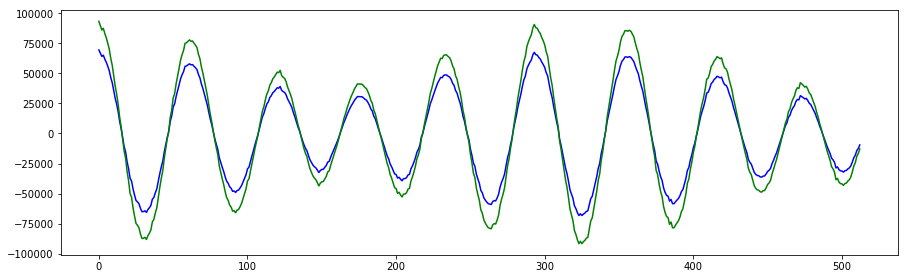

In [69]:
lw =1.5
fig, (axij) = plt.subplots(1, figsize=(15,4.5))
axij.plot(ijvis_, c='b', label = 'aicraj')
axij.plot(ijvis, c='g')
# axij.plot(ijvis_/(sol['etai'] * sol['etaj']), c='b', label = 'aicraj')
# axij.plot(jkvis, c='r', label = 'ajcrak')
# axij.plot(jkvis_, c='y')
# axij.plot(klvis, c='m', label = 'akcral')
# axij.plot(klvis_, c='black')

# axij.set_xlim(50,100)

In [ ]:
axij.plot(ijvis, c='b', label = 'aicraj')
axij.plot(ijvis_, c='g')
axij.plot(jkvis, c='r', label = 'ajcrak')
axij.plot(jkvis_, c='y')
axij.plot(klvis, c='m', label = 'akcral')
axij.plot(klvis_, c='black')

axij.plot(ikvis, c='b', label = 'aicrak')
axij.plot(ikvis_, c='g')
axij.plot(jlvis, c='r', label = 'ajcral')
axij.plot(jlvis_, c='y')

axij.plot(ilvis, c='b', label = 'aicral')
axij.plot(ilvis_, c='g')

In [ ]:
ijlog= np.log(ijvis)
jklog= np.log(jkvis)
kllog= np.log(klvis)
ijlog_= np.log(ijvis_)
jklog_= np.log(jkvis_)
kllog_= np.log(klvis_)+np.log(.97)

lw =1.5
fig, (axij) = plt.subplots(1, figsize=(15,4.5))
# axij.plot(ijlog, c='b', label = 'aicraj')
# axij.plot(ijlog_, c='g')
# axij.plot(jklog, c='r', label = 'ajcrak')
# axij.plot(jklog_, c='y')
axij.plot(kllog, c='m', label = 'akcral')
axij.plot(kllog_, c='black')


In [ ]:
ij_jk = ij/jk
jk_kl = jk/kl
ij_kl = ij/kl

ij[2], jk[2],ij_jk[2]

plt.plot(ij_jk)
plt.plot(jk_kl)
plt.plot(ij_kl)

In [ ]:
lvism = np.log(vism)

In [ ]:
np.angle((np.sqrt(2) / 2 ) + (np.sqrt(2)/2)*1j)